1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp – признак), а за y – значения скорингового балла (то есть, ks – целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
import numpy as np

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
zp, ks

(array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]),
 array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]))

In [4]:
b = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2)-np.mean(zp)**2)
b

2.620538882402765

In [5]:
a = np.mean(ks) - b * np.mean(zp)
a

444.1773573243596

Получено уравнение регрессии y = 444.18 + 2.62 * x

In [6]:
# Уравнение без интерсепта:
beta = np.mean(ks*zp)/np.mean(zp**2)
beta

5.889820420132688

Матричный метод расчета коэффициентов линейной регрессии

In [7]:
# Если мы хотим построить модель без интерсепта, тогда просто не добавляем столбец единиц.
x = zp.reshape((10, 1))
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [8]:
y = ks.reshape((10, 1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [9]:
# интерсепт через функцию Python
# from sklearn.linear_model import LinearRegression
# regres = model.fit(x, y)
# print(regres.intersept_) 

In [10]:
x = zp.reshape((10, 1))
y = ks.reshape((10, 1))
B = np.dot(np.linalg.inv(np.dot(x.T,x)), x.T @ y)
B

array([[5.88982042]])

Уравнение регрессии без интерсепта: y = 5.88982042 * x

In [11]:
X = np.hstack([np.ones((10, 1)), x])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [12]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ y)
B

array([[444.17735732],
       [  2.62053888]])

Уравнение регрессии с интерсептом: y = 444.17735732 - 2.62053888 * x

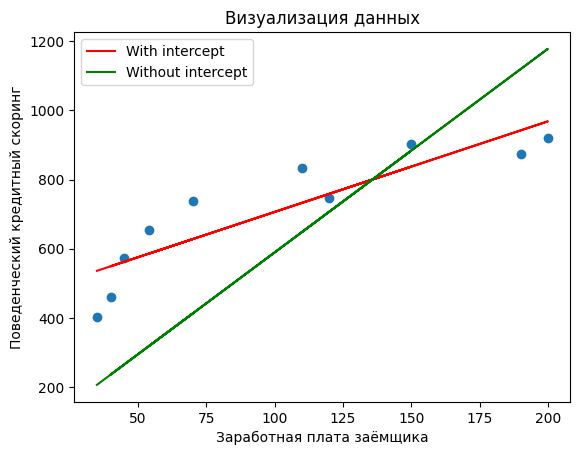

In [13]:
# визуализируем результат
import matplotlib.pyplot as plt
plt.title('Визуализация данных')
plt.scatter(zp, ks) # график разброса
plt.xlabel('Заработная плата заёмщика')
plt.ylabel('Поведенческий кредитный скоринг')
plt.plot(zp, 444.18 + 2.62 * zp, color='red', label='With intercept')
plt.plot(zp, 5.89 * zp, color='green', label='Without intercept')
plt.legend()  # чтобы отражались подписи label
plt.show()

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [14]:
# градиентный спуск
def mse_(B1, y = ks, x = zp, n = 10):
    return np.sum((B1*x - y)**2) / n # mse - средняя квадратичная ошибка без интерсепта

alpha = 1e-6
B1 = 0.1
n = 10

for i in range(3000 + 1): # + 1, чтобы вывел 3000ю итерацию
    B1 -= alpha * (2/n) * np.sum((B1 * x - y) * x)
    if i % 300 == 0: # будем выводить каждую 300-ю итерацию
        print('Iteration = {i}, B1 = {B1}, mse = {mse}'.format(i = i, B1 = B1, mse = mse_(B1)))

Iteration = 0, B1 = 0.25952808, mse = 493237.7212546963
Iteration = 300, B1 = 5.888531320728348, mse = 56516.88130936019
Iteration = 600, B1 = 5.889820124983314, mse = 56516.85841572062
Iteration = 900, B1 = 5.889820420065112, mse = 56516.85841571941
Iteration = 1200, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 1500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 1800, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 2100, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 2400, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 2700, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 3000, B1 = 5.889820420132673, mse = 56516.85841571943


3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [17]:
# коэффициенты подбираются так, что сумма квадратов расстояний от 
# синих точек до прямой минимальна. Иными словами, в основе линейной 
# регрессии лежит метода наименьших квадратов.

def mse_(B0, B1, y = ks, x = zp, n = 10):
    return (2/n) * np.sum((B0 + B1 * x - y) * x)
alpha = 1e-5
B1 = 0.1
B0 = 0.1
n = 10

for i in range(5000000 + 1): # + 1
    B1 -= alpha * (2/n) * np.sum((B0 + B1 * x - y) * x) # коэффициент при x
    B0 -= alpha * (2/n) * np.sum((B0 + B1 * x - y))     # свободный коэффициент
    if i % 500000 == 0:
        print('Iteration = {i}, B1 = {B1}, B0 = {B0}'.format(i = i, B1 = B1, B0 = B0))

Iteration = 0, B1 = 1.6950780000000003, B0 = 0.110758381816
Iteration = 500000, B1 = 2.879192093262043, B0 = 409.03636900034104
Iteration = 1000000, B1 = 2.641008305785271, B0 = 441.3963527286912
Iteration = 1500000, B1 = 2.622158801568773, B0 = 443.9572728324277
Iteration = 2000000, B1 = 2.6206670803521663, B0 = 444.15994017099007
Iteration = 2500000, B1 = 2.6205490277943326, B0 = 444.17597895721923
Iteration = 3000000, B1 = 2.6205396852936835, B0 = 444.17724824247233
Iteration = 3500000, B1 = 2.6205389459423394, B0 = 444.1773486917838
Iteration = 4000000, B1 = 2.6205388874313043, B0 = 444.17735664117527
Iteration = 4500000, B1 = 2.62053888280182, B0 = 444.1773572701435
Iteration = 5000000, B1 = 2.6205388824440017, B0 = 444.1773573187572


Уравнение регрессии с intercept, найденное через градиентный спуск: y = 444.177 - 2.6205 * x